In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
X = np.random.randn(10,3)
X[:,0] = 1
X

array([[ 1.        ,  1.69004713, -0.74506967],
       [ 1.        , -0.66852766,  1.19028309],
       [ 1.        , -0.5240313 , -0.09614694],
       [ 1.        ,  0.67032022, -0.900015  ],
       [ 1.        ,  1.96676341, -0.55975826],
       [ 1.        , -0.80397999,  0.2676562 ],
       [ 1.        , -0.22669468, -0.97415782],
       [ 1.        , -0.45091867, -3.05202272],
       [ 1.        ,  0.8535724 , -0.69244888],
       [ 1.        , -1.318375  , -0.64138184]])

In [5]:
beta = np.random.randn(3)

In [9]:
sigma = 1.0

In [10]:
epsilon = np.random.randn(10) * sigma

Y = X @ beta + epsilon

In [11]:
mod = sm.OLS(Y,X)
res = mod.fit()
res.summary()

C:\Users\yiyuezhuo\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     4.839
Date:                Wed, 13 Nov 2019   Prob (F-statistic):             0.0479
Time:                        18:18:29   Log-Likelihood:                -13.744
No. Observations:                  10   AIC:                             33.49
Df Residuals:                       7   BIC:                             34.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5423      0.423      1.282      0.241      -0.458       1.542
x1             0.8159      0.345      2.362      0.050      -0.001       1.633
x2            -0.6110      0.356     -1.717      0.130      -1.452       0.230
==============================================================================
Omnibus:                        1.996   Durbin-Watson:                   2.534
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                0.318
Skew:                          -0.399   Prob(JB):                        0.853
Kurtosis:                       3.354   Cond. No.                         1.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
def exper(sigma, num_sample=1000):
    r_list = []
    for i in range(num_sample):
        epsilon = np.random.randn(10) * sigma
        Y = X @ beta + epsilon

        mod = sm.OLS(Y,X)
        res = mod.fit()
        r_list.append(res.rsquared)
    return r_list

In [29]:
rl = [1.,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

In [31]:
rd = {r:exper(r) for r in rl}

(array([ 0.42089054,  0.        ,  0.        ,  1.26267161,  1.26267161,
         0.84178107,  2.52534322,  2.94623376,  5.05068645,  5.47157699,
         7.99692021,  7.99692021, 22.72808902, 13.46849719, 37.03836728,
        29.88322815, 33.67124299, 41.66816319, 50.08597394, 51.76953609,
        46.71884964, 31.98768084, 20.20274579,  5.89246752]),
 array([0.94229677, 0.94467268, 0.9470486 , 0.94942451, 0.95180043,
        0.95417634, 0.95655226, 0.95892817, 0.96130409, 0.96368   ,
        0.96605592, 0.96843183, 0.97080775, 0.97318366, 0.97555958,
        0.97793549, 0.9803114 , 0.98268732, 0.98506323, 0.98743915,
        0.98981506, 0.99219098, 0.99456689, 0.99694281, 0.99931872]),
 <a list of 24 Patch objects>)

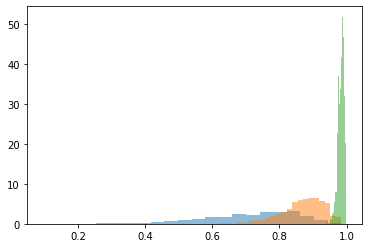

In [37]:
plt.hist(rd[1.], bins= 'auto', density=True,alpha=0.5)
plt.hist(rd[0.6], bins= 'auto', density=True,alpha=0.5)
plt.hist(rd[0.2], bins= 'auto', density=True,alpha=0.5)

In [38]:
x = np.arange(10)
def exper2(p2, sigma=1., num_sample=1000):
    beta = np.array([1., 1., p2])
    X = np.c_[np.ones(10), x, x**2]
    
    r_list = []
    
    for i in range(num_sample):
        epsilon = np.random.randn(10) * sigma
        Y = X @ beta + epsilon
        mod = sm.OLS(Y, X)
        res = mod.fit()
        r_list.append(res.rsquared)
        
    return r_list

In [44]:
rl2 = np.linspace(0,2,20)
rd2 = {r:exper2(r) for r in rl2}

(array([  3.0235053 ,   0.        ,   0.        ,   6.0470106 ,
          0.        ,   0.        ,   3.0235053 ,   6.0470106 ,
          9.07051589,   6.0470106 ,  12.09402119,  27.21154768,
         21.16453709,  39.30556887,  51.39959007,  63.49361126,
         78.61113775,  99.77567484,  87.68165364, 211.64537086,
        211.64537086, 281.18599272, 314.444551  , 317.46805629,
        383.98517285, 281.18599272, 272.11547682, 181.41031788,
         54.42309536]),
 array([0.99019294, 0.99052368, 0.99085442, 0.99118516, 0.9915159 ,
        0.99184665, 0.99217739, 0.99250813, 0.99283887, 0.99316961,
        0.99350036, 0.9938311 , 0.99416184, 0.99449258, 0.99482332,
        0.99515407, 0.99548481, 0.99581555, 0.99614629, 0.99647703,
        0.99680777, 0.99713852, 0.99746926, 0.9978    , 0.99813074,
        0.99846148, 0.99879223, 0.99912297, 0.99945371, 0.99978445]),
 <a list of 29 Patch objects>)

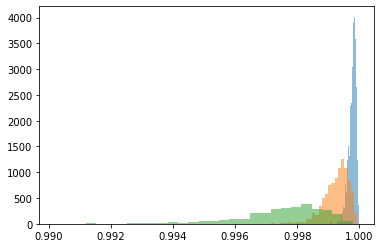

In [54]:
plt.hist(rd2[rl2[-1]], bins= 'auto', density=True,alpha=0.5)
plt.hist(rd2[rl2[-10]], bins= 'auto', density=True,alpha=0.5)
plt.hist(rd2[rl2[-15]], bins= 'auto', density=True,alpha=0.5)

In [55]:
rl2[-1], rl2[-10], rl2[-15]

(2.0, 1.0526315789473684, 0.5263157894736842)

In [56]:
np.mean(rd2[rl2[-1]]), np.mean(rd2[rl2[-10]]), np.mean(rd2[rl2[-15]])

(0.9997765011334299, 0.999260442378722, 0.997544825729865)

In [57]:
 np.convolve?

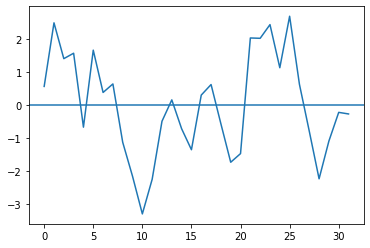

In [59]:
Y = np.random.randn(30)
Y = np.convolve(Y, np.ones(3))
plt.plot(Y)
plt.axhline(np.mean(Y))

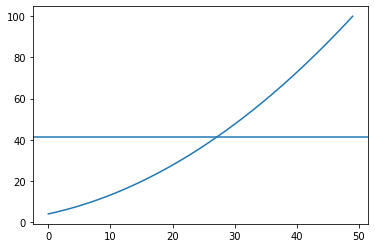

In [60]:
Y = np.linspace(2,10)**2
plt.plot(Y)
plt.axhline(np.mean(Y))